# Project: Build and Deploy an End-to-End Deep Learning System

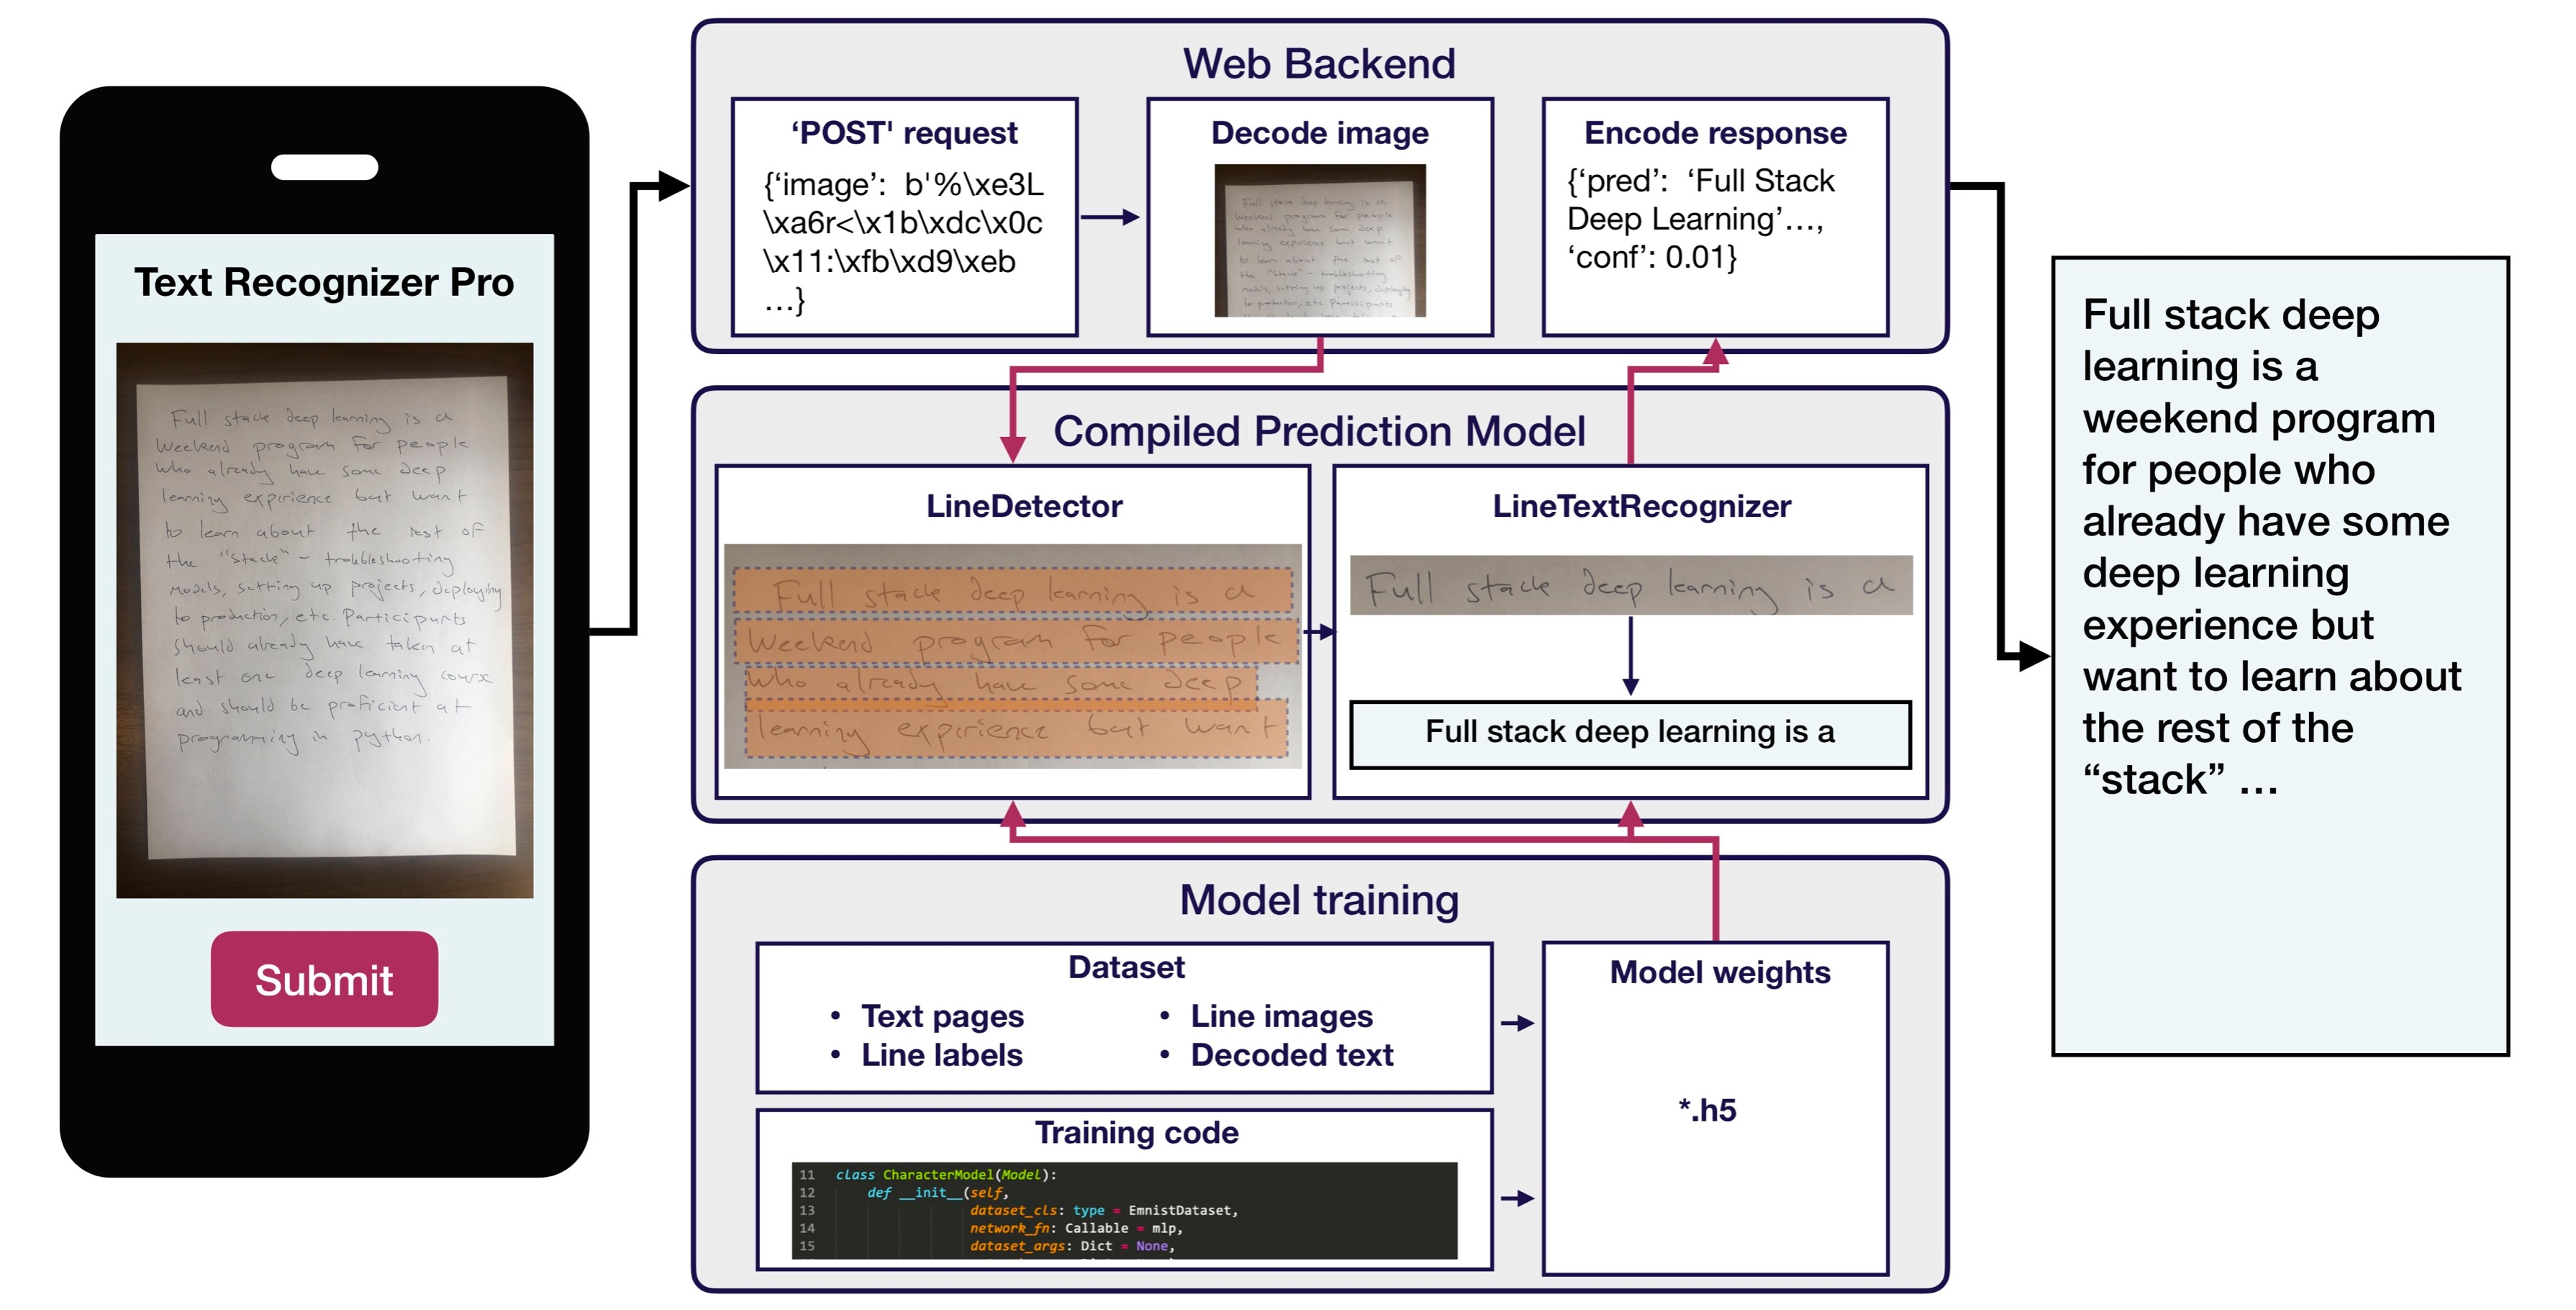

### 1) First section: Quick Setup for "fsdl-text-recognizer-project"


In [5]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 180 kB 45.5 MB/s 
     |████████████████████████████████| 97 kB 5.5 MB/s 
     |████████████████████████████████| 143 kB 58.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=f549493dc8626aafa892ca05ed9f384d1f5d189b00aea99513f0660a7dbcf69b
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=c567761ef22325c772ef7ffbec9299220e191cedfafa25de72d48f7bf63f83eb
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [6]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
import wandb
import tensorflow as tf

wandb.init(project="fsdl-text-recognizer-project", entity="marmarhoun")

wandb: Currently logged in as: marmarhoun (use `wandb login --relogin` to force relogin)


### Wandb config


```
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

# ... Define a model
```




In [8]:
!git clone https://github.com/full-stack-deep-learning/fsdl-text-recognizer-project.git


Cloning into 'fsdl-text-recognizer-project'...
remote: Enumerating objects: 2044, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 2044 (delta 13), reused 13 (delta 7), pack-reused 2005
Receiving objects: 100% (2044/2044), 6.16 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (1410/1410), done.


In [21]:
cd fsdl-text-recognizer-project

[Errno 2] No such file or directory: 'fsdl-text-recognizer-project/lab1'
/content/fsdl-text-recognizer-project


In [22]:
cd lab1

/content/fsdl-text-recognizer-project/lab1


In [24]:
ls

notebooks/  readme.md  tasks/  text_recognizer/  training/


#### Look at the EMNIST dataset 




In [28]:
!pip install boltons

     |████████████████████████████████| 193 kB 5.2 MB/s 


In [29]:
%load_ext autoreload
%autoreload 2

#%reload_ext autoreload

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets.emnist_dataset import EmnistDataset

In [30]:
emnist_data = EmnistDataset()
print(emnist_data)

EMNIST Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Input shape: [28, 28]



In [31]:
emnist_data.load_or_generate_data()
emnist_data.x_train.shape, emnist_data.y_train.shape

709MB [00:22, 33.6MB/s]                           


Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...


((336299, 28, 28), (336299, 80))

In [32]:
emnist_data.x_test.shape, emnist_data.y_test.shape

((55789, 28, 28), (55789, 80))

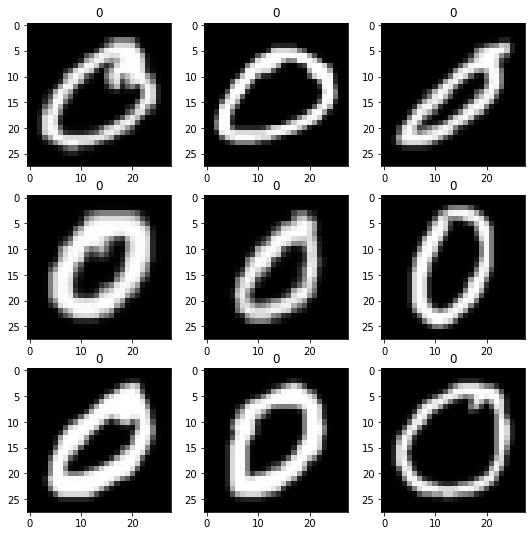

In [33]:
fig = plt.figure(figsize=(9, 9))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(emnist_data.x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(emnist_data.mapping[np.argmax(emnist_data.y_train[i])])

#### Networks and training code
- text_recognizer/networks/mlp.py
- text_recognizer/networks/lenet.py
- text_recognizer/models/base.py
- text_recognizer/models/character_model.py
- training/util.py

#### Now let's run some training

In [37]:
run training/run_experiment.py --save \
  '{"dataset": "EmnistDataset", "model": "CharacterModel", "network": "mlp",  "train_args": {"batch_size": 256}}'

Running experiment with config {'dataset': 'EmnistDataset', 'model': 'CharacterModel', 'network': 'mlp', 'train_args': {'batch_size': 256}} on GPU 0
EMNIST Dataset
Num classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Input shape: [28, 28]

Model: "sequential"
_________________________________________________________

<Figure size 432x288 with 0 Axes>

> Just for fun, you could also try a larger MLP, with a smaller batch size:


```
training/run_experiment.py \
  '{"dataset": "EmnistDataset", "model": "CharacterModel", "network": "mlp", "network_args": {"num_layers": 8}, "train_args": {"batch_size": 128}}'
```



#### Now let's test the trained model

First, let's take a look at how the test works at



In [41]:
run text_recognizer/tests/test_character_predictor.py

Now let's see if the test works by running the following comands:



```
pytest -s text_recognizer/tests/test_character_predictor.py

# Or run tasks/test_functionality.sh
```



In [49]:
!pip install pytest